In [25]:
import pandas as pd
d=pd.read_csv('/content/Mumbai_1990_2022_Santacruz.csv')
print(d)

             time  tmin  tmax  prcp  tavg
0        1/1/1990  17.0  29.9   0.0  23.2
1        2/1/1990  16.5  29.9   0.0  22.2
2        3/1/1990  16.3  30.7   0.0  21.8
3        4/1/1990  17.9  31.8   0.0  25.4
4        5/1/1990  19.3  33.7   0.0  26.5
...           ...   ...   ...   ...   ...
11889  21-07-2022  25.6  30.5  10.9  27.6
11890  22-07-2022  26.0  30.5   3.0  28.3
11891  23-07-2022  25.8  31.3   5.1  28.2
11892  24-07-2022  25.6  30.4   7.1  28.1
11893  25-07-2022  25.1  30.2   7.1  28.3

[11894 rows x 5 columns]


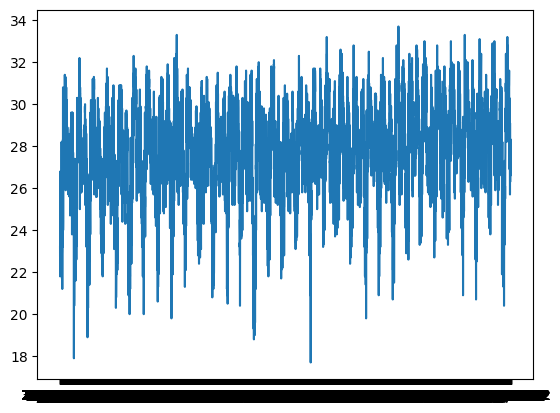

In [ ]:
from matplotlib import pyplot as pt
x=d['time']
y=d['tavg']
pt.plot(x,y)


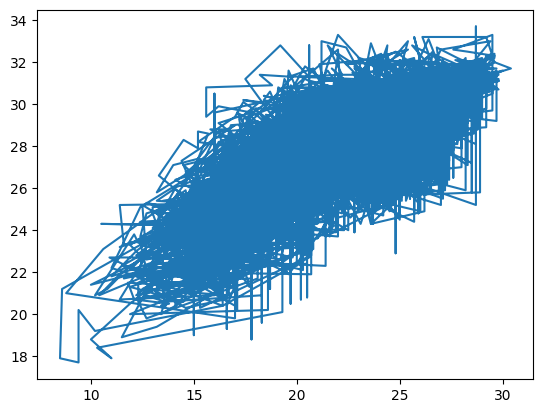

In [ ]:
from matplotlib import pyplot as pt
x=d['tmin']
y=d['tavg']
pt.plot(x,y)


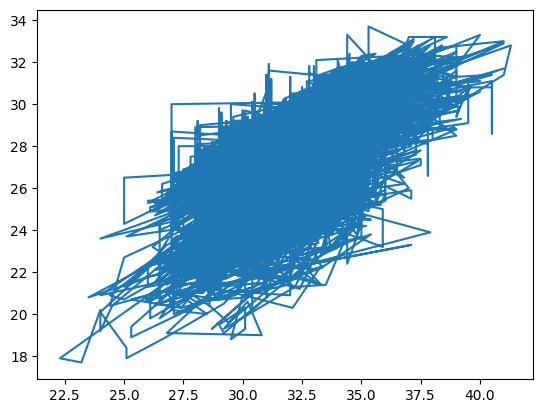

In [ ]:
from matplotlib import pyplot as pt
x=d['tmax']
y=d['tavg']
pt.plot(x,y)


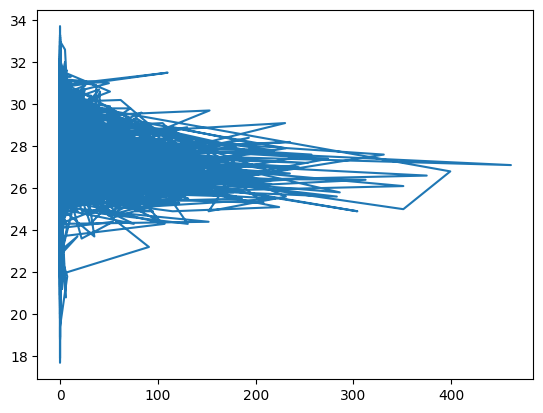

In [ ]:
from matplotlib import pyplot as pt
x=d['prcp']
y=d['tavg']
pt.plot(x,y)


In [ ]:
print(d.isnull())

        time   tmin   tmax   prcp   tavg
0      False  False  False  False  False
1      False  False  False  False  False
2      False  False  False  False  False
3      False  False  False  False  False
4      False  False  False  False  False
...      ...    ...    ...    ...    ...
11889  False  False  False  False  False
11890  False  False  False  False  False
11891  False  False  False  False  False
11892  False  False  False  False  False
11893  False  False  False  False  False

[11894 rows x 5 columns]


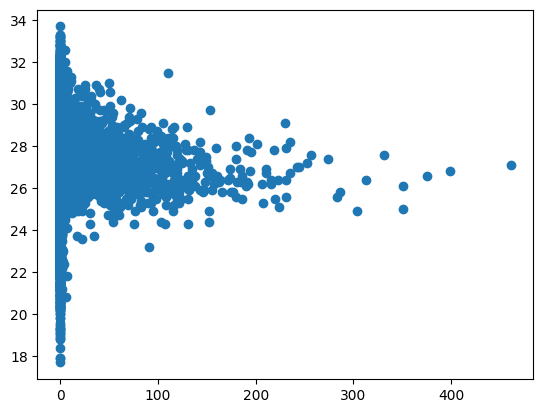

In [ ]:
pt.scatter(x,y)

In [ ]:
corr_matrix = d.corr()
print(corr_matrix)


          tmin      tmax      prcp      tavg
tmin  1.000000  0.113209  0.120149  0.717776
tmax  0.113209  1.000000 -0.306453  0.594142
prcp  0.120149 -0.306453  1.000000 -0.076533
tavg  0.717776  0.594142 -0.076533  1.000000


<Axes: >

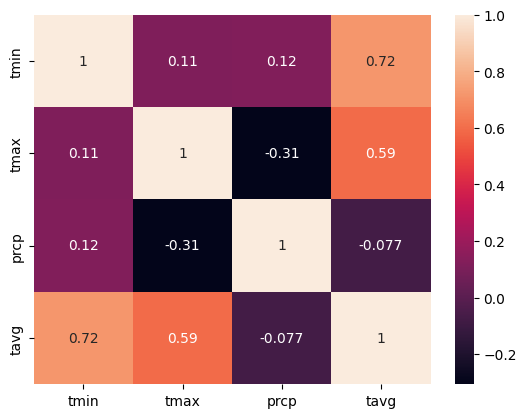

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix,annot=True)

In [ ]:
cov_matrix = d.cov()
print(cov_matrix)


           tmin       tmax        prcp      tavg
tmin  13.903993   0.949497   10.677035  5.861225
tmax   0.949497   5.059278  -16.427395  2.926607
prcp  10.677035 -16.427395  567.965653 -3.994302
tavg   5.861225   2.926607   -3.994302  4.795779


<Axes: >

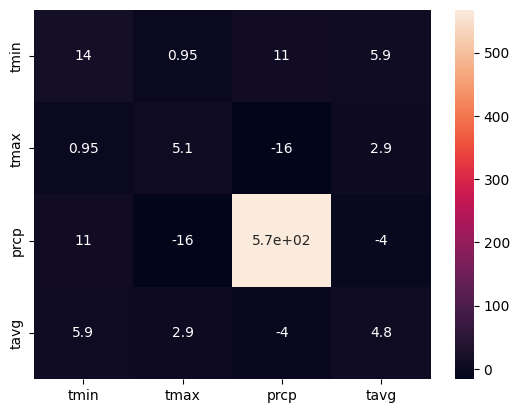

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cov_matrix,annot=True)

In [ ]:
x=d.iloc[:,0:4]
y=d.iloc[:,4:5]
print(x)
print(y)

       time  tmin  tmax  prcp
0         0  17.0  29.9   0.0
1      4301  16.5  29.9   0.0
2      8573  16.3  30.7   0.0
3      9548  17.9  31.8   0.0
4      9939  19.3  33.7   0.0
...     ...   ...   ...   ...
11889  5313  25.6  30.5  10.9
11890  5704  26.0  30.5   3.0
11891  6095  25.8  31.3   5.1
11892  6486  25.6  30.4   7.1
11893  6877  25.1  30.2   7.1

[11894 rows x 4 columns]
       tavg
0      23.2
1      22.2
2      21.8
3      25.4
4      26.5
...     ...
11889  27.6
11890  28.3
11891  28.2
11892  28.1
11893  28.3

[11894 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()
result=le.fit_transform(d['time'])
print(result)

[   0 4301 8573 ... 6095 6486 6877]


In [ ]:
d.time=result

In [ ]:
from sklearn.model_selection import train_test_split
print(x.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=True,test_size=0.20)

(11894, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
mm=lr.fit(x_train,y_train)

In [ ]:
yp=mm.predict(x_test)

In [ ]:
print(x_test,y_test)

       time  tmin  tmax  prcp
586     719  25.4  30.6   3.0
8126    217  21.8  34.9   0.0
5815   8685  18.9  34.0   0.0
8652  11885  24.8  29.5   0.0
7189  11099  25.9  27.7  20.1
...     ...   ...   ...   ...
6993   5917  19.1  35.0   0.0
32     4430  16.0  31.1   0.0
1510   3947  18.6  30.5   0.0
4006   5061  15.2  34.8   0.0
1409    459  24.0  35.3   0.0

[2379 rows x 4 columns]       tavg
586   28.0
8126  29.6
5815  27.5
8652  27.5
7189  25.3
...    ...
6993  28.8
32    23.2
1510  24.6
4006  25.5
1409  30.9

[2379 rows x 1 columns]


In [ ]:
print(yp)

[[27.8966921 ]
 [28.69892622]
 [27.1166076 ]
 ...
 [25.2199932 ]
 [26.09975257]
 [29.75104438]]


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yp,y_test))

1.0542857644685266


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(yp,y_test))

0.7551670813277243


In [27]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

[[27.86]
 [28.04]
 [26.46]
 ...
 [23.38]
 [23.96]
 [28.26]]
1.6326278268179908


In [30]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27.99562208 28.00001371 28.01329637 ... 28.05189287 28.086874
 27.99983098]
4.894978414355352


[28.  27.3 26.6 ... 25.1 26.3 28.7]
1.7594745691467002


[Text(0.3763206053865846, 0.9864864864864865, 'x[1] <= 20.25\nsquared_error = 4.786\nsamples = 9515\nvalue = 27.766'),
 Text(0.12480156338663013, 0.9594594594594594, 'x[2] <= 31.95\nsquared_error = 4.414\nsamples = 2465\nvalue = 25.486'),
 Text(0.04231359899981593, 0.9324324324324325, 'x[2] <= 28.95\nsquared_error = 2.943\nsamples = 1085\nvalue = 24.125'),
 Text(0.007079551284645481, 0.9054054054054054, 'x[2] <= 26.95\nsquared_error = 2.094\nsamples = 274\nvalue = 22.781'),
 Text(0.0013676949835663376, 0.8783783783783784, 'x[1] <= 12.3\nsquared_error = 2.229\nsamples = 38\nvalue = 20.908'),
 Text(0.0005569995478730233, 0.8513513513513513, 'x[0] <= 11454.5\nsquared_error = 1.251\nsamples = 7\nvalue = 18.8'),
 Text(0.0004455996382984186, 0.8243243243243243, 'x[1] <= 9.7\nsquared_error = 0.34\nsamples = 6\nvalue = 18.4'),
 Text(0.0002227998191492093, 0.7972972972972973, 'x[0] <= 11063.5\nsquared_error = 0.01\nsamples = 2\nvalue = 17.8'),
 Text(0.00011139990957460465, 0.7702702702702703, '

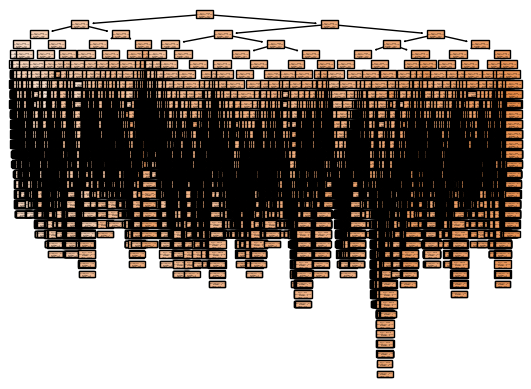

In [31]:
 from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
from sklearn import tree
tree.plot_tree(model,filled=True)